In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
list= [0.86]
r=3
for i in range(201):
    list.append(r*list[i]*(1-list[i]))

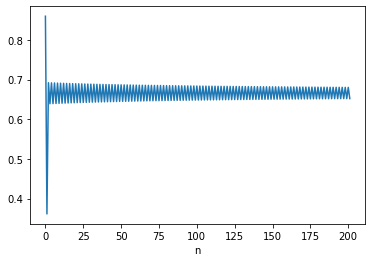

In [5]:
plt.plot(list)
plt.xlabel('n')
plt.show()

In [32]:
def logfun(r,x):
    y = r*x*(1-x)
    return y

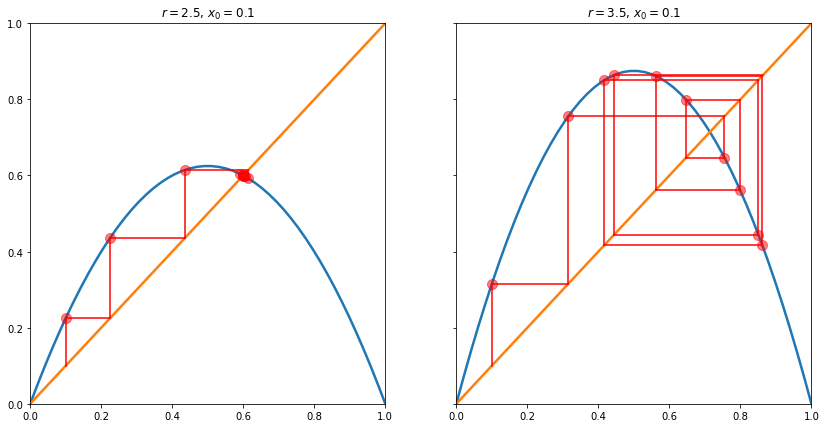

In [37]:
def logmap(r, x0, n, ax=None):
    z = np.linspace(0,1)
    ax.plot(z, logfun(r,z), lw=2.5)
    ax.plot([0,1],[0,1], lw=2.5)
    x=x0
    for i in range(n):
        y=logfun(r,x)
        ax.plot([x,x], [x,y], 'r', lw=1.5)
        ax.plot([x,y],[y,y], 'r', lw=1.5)
        ax.plot([x],[y],'or',ms=10,alpha=0.5)
        x=y
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")
    
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,7), sharey='row')
logmap(2.5, 0.1, 10, ax=ax1)
logmap(3.5, 0.1, 10, ax=ax2)

In [68]:
n = 10000
r = np.linspace(2.5, 4.0, n, endpoint=True)

In [72]:
iters=1000
x=0.0001
last=200
m=iters-last
A=np.zeros((m,n))
for j in range(n):
    for i in range(iters):
        x = logfun(r[j], x)
        if i >= (iters - last):
            A[i-m,j]=x
A

array([[0.6       , 0.600024  , 0.600048  , ..., 0.05104904, 0.0448917 ,
        0.94176018],
       [0.6       , 0.600024  , 0.600048  , ..., 0.1937576 , 0.17149931,
        0.21939176],
       [0.6       , 0.600024  , 0.600048  , ..., 0.6248155 , 0.56832788,
        0.68503606],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
iters=1000
x=200
last=200
m=iters-last
A=np.zeros((m,n))
for j in range(n):
    for i in range(iters):
        x = logfun(r[j], x)
        if i >= (iters - last):
            A[i-m,j]=x
A

<ipython-input-32-d3a769a6c330>:2: RuntimeWarning: overflow encountered in double_scalars
  y = r*x*(1-x)


array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [63]:
def bifmap(iters,last,color):
    fig, ax = plt.subplots(figsize=(8, 8))
    x = np.full(n,0.000001)
    for i in range(iters):
        x = logfun(r, x)
        if i >= (iters - last):
            ax.plot(r, x, color, alpha=.25)
    ax.set_xlim(2.5, 4)
    ax.set_title("Bifurcation diagram")

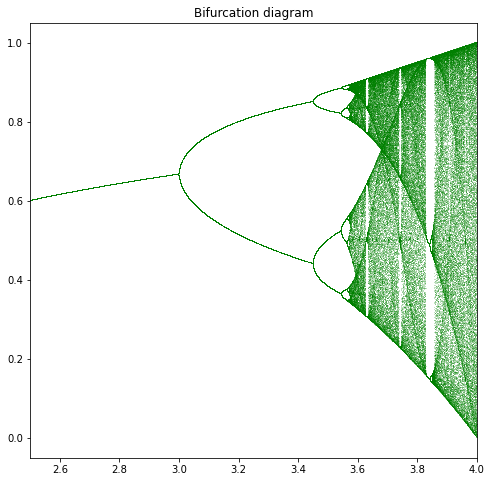

In [64]:
bifmap(1000,50,',g')